# Mapa de España por provicias con datos cualitativos
### Nombres curiosos de pueblos de España

##### Proyecto realizado para @Datazomundo por Santiago Haro, haciendo uso de la base de datos de municipios del Instituto Nacional de Estadísticas de Espana (INE)

In [1]:
# Importamos librerías 
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
# Cargar el mapa de España por comunidades autónomas
provincias = gpd.read_file("C:/Users/Santiago/Downloads/provincias-espanolas.geojson")

In [2]:
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from matplotlib.patches import PathPatch

In [3]:
## VISUALIZAMOS LOS DATOS, NOMBRE DE LAS VARIABLES, ETC.

provincias = gpd.read_file("C:/Users/Santiago/Downloads/provincias-espanolas.geojson")

# Mostrar las primeras filas del DataFrame
provincias.head()

,geo_point_2d,ccaa,cod_ccaa,provincia,texto,codigo,geometry
0,"{ ""lon"": -0.14677708693700001, ""lat"": 40.24137...",Comunitat Valenciana,10,Castelló,Castellón,12,"MULTIPOLYGON (((0.68867 39.90041, 0.68837 39.8..."
1,"{ ""lon"": -6.8293022103099998, ""lat"": 37.577179...",Andalucía,01,Huelva,Huelva,21,"POLYGON ((-6.92723 38.20444, -6.92432 38.20524..."
2,"{ ""lon"": -17.017856742999999, ""lat"": 28.312556...",Canarias,05,Santa Cruz de Tenerife,Santa Cruz de Tenerife,38,"MULTIPOLYGON (((-17.92511 27.84925, -17.92354 ..."
3,"{ ""lon"": -4.9455350561899998, ""lat"": 40.571036...",Castilla y León,07,Ávila,Ávila,05,"POLYGON ((-5.01386 41.16425, -5.01094 41.16197..."
4,"{ ""lon"": -5.7604183752000004, ""lat"": 36.553872...",Andalucía,01,Cádiz,Cádiz,11,"MULTIPOLYGON (((-5.43733 36.06423, -5.43740 36..."


In [4]:
# Asignar los datos a las comunidades, en este caso los nombres curiosos de pueblos.
datos = {
    "A Coruña":"Cariño",
    "Alacant":"Dolores",
    "Albacete":"Cotillas",
    "Almería":"La \n Mojonera",
    "Araba":"Elciego",
    "Asturias":"Teverga",
    "Ávila":"Cabezas de \n Alambre",
    "Badajoz":"Malcocinado",
    "Barcelona":"Berga",
    "Bizkaia":"Ea",
    "Burgos":"Quemada",
    "Cáceres":"El Gordo",
    "Cádiz":"Espera",
    "Cantabria":"Limpias",
    "Castelló":"Navajas",
    "Ciudad Real":"Chillón",
    "Córdoba":"Cabra",
    "Cuenca":"Uña",
    "Gipuzcoa":"Elgeta",
    "Girona":"Espolla",
    "Granada":"Dólar",
    "Guadalajara":"Matarrubia",
    "Huelva":"Niebla",
    "Huesca":"Palo",
    "Jaén":"Guarromán",
    "La Rioja":"Cenicero",
    "León":"Truchas",
    "Lleida":"Estaràs",
    "Lugo":"Bóveda",
    "Madrid":"Cenicientos",
    "Málaga":"Humilladero",
    "Murcia":"Mula",
    "Navarra":"Lapoblación",
    "Ourense":"Avión",
    "Palencia":"Antigüedad",
    "Pontevedra":"Poio",
    "Salamanca":"Buenamadre",
    "Segovia":"Coca",
    "Sevilla":"Camas",
    "Soria":"Los \n Rábanos",
    "Tarragona":"L'Ampolla",
    "Teruel":"Pancrudo",
    "Toledo":"Pepino",
    "València":"Chiva",
    "Valladolid":"Pollos",
    "Zamora":"Peleas \n de Abajo",
    "Zaragoza":"La Muela",
}

In [5]:
import pandas as pd

# Crear un DataFrame a partir de los datos
df = pd.DataFrame.from_dict(datos, orient="index", columns=["dato"])

In [6]:
# Agregar una columna con los nombres de las comunidades autónomas
df["provincia"] = df.index

In [7]:
# Eliminar el índice anterior y reemplazarlo con un índice numérico
df = df.reset_index(drop=True)

# Imprimir el DataFrame resultante sin la columna del índice anterior
print(df.to_string(index=False))

                 dato   provincia
               Cariño    A Coruña
              Dolores     Alacant
             Cotillas    Albacete
       La \n Mojonera     Almería
              Elciego       Araba
              Teverga    Asturias
Cabezas de \n Alambre       Ávila
          Malcocinado     Badajoz
                Berga   Barcelona
                   Ea     Bizkaia
              Quemada      Burgos
             El Gordo     Cáceres
               Espera       Cádiz
              Limpias   Cantabria
              Navajas    Castelló
              Chillón Ciudad Real
                Cabra     Córdoba
                  Uña      Cuenca
               Elgeta    Gipuzcoa
              Espolla      Girona
                Dólar     Granada
           Matarrubia Guadalajara
               Niebla      Huelva
                 Palo      Huesca
            Guarromán        Jaén
             Cenicero    La Rioja
              Truchas        León
              Estaràs      Lleida
              

In [8]:
# Fusionar los dos objetos usando la columna "acom_name"
merged = provincias.merge(df, on="provincia")

In [9]:
# Aquí solo estoy experimentando calcular el área de cada región con la función .area
area = merged["geometry"][0].area

In [10]:
# Meto area en el DF merged
merged["area"] = merged["geometry"].apply(lambda x: x.area)

In [11]:
# Miro los valores de area para crear el umbral que usé arriba
print(merged.loc[:, ['provincia', 'area']])

      provincia      area
0      Castelló  0.702091
1        Huelva  1.033160
2         Ávila  0.856050
3         Cádiz  0.748599
4      València  1.129751
5      Palencia  0.879969
6   Guadalajara  1.303320
7       Segovia  0.742761
8        Zamora  1.142850
9        Madrid  0.853082
10    Cantabria  0.589253
11      Bizkaia  0.245174
12      Badajoz  2.254487
13       Huesca  1.704962
14         Lugo  1.088459
15        Soria  1.113461
16       Toledo  1.616056
17      Navarra  1.141568
18     Albacete  1.548501
19      Cáceres  2.087021
20  Ciudad Real  2.058016
21       Lleida  1.323707
22      Alacant  0.600553
23       Murcia  1.159797
24    Barcelona  0.836673
25       Cuenca  1.804993
26      Sevilla  1.428963
27   Valladolid  0.876369
28      Córdoba  1.412436
29         León  1.709708
30         Jaén  1.384641
31       Burgos  1.562277
32     Gipuzcoa  0.218875
33    Salamanca  1.317970
34       Málaga  0.738318
35      Ourense  0.793030
36    Tarragona  0.675635
37      Alme

In [12]:
# Miro los valores de area para crear el umbral que usé arriba
print(merged.loc[:, ['provincia', 'area', 'dato']])

      provincia      area                   dato
0      Castelló  0.702091                Navajas
1        Huelva  1.033160                 Niebla
2         Ávila  0.856050  Cabezas de \n Alambre
3         Cádiz  0.748599                 Espera
4      València  1.129751                  Chiva
5      Palencia  0.879969             Antigüedad
6   Guadalajara  1.303320             Matarrubia
7       Segovia  0.742761                   Coca
8        Zamora  1.142850     Peleas \n de Abajo
9        Madrid  0.853082            Cenicientos
10    Cantabria  0.589253                Limpias
11      Bizkaia  0.245174                     Ea
12      Badajoz  2.254487            Malcocinado
13       Huesca  1.704962                   Palo
14         Lugo  1.088459                 Bóveda
15        Soria  1.113461         Los \n Rábanos
16       Toledo  1.616056                 Pepino
17      Navarra  1.141568            Lapoblación
18     Albacete  1.548501               Cotillas
19      Cáceres  2.0

In [13]:
# Calcular el punto medio de cada geometría
merged["coords"] = merged["geometry"].apply(lambda x: x.representative_point().coords[:])
merged["coords"] = [coords[0] for coords in merged["coords"]]

In [14]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.patheffects as path_effects

In [15]:
from matplotlib import colors

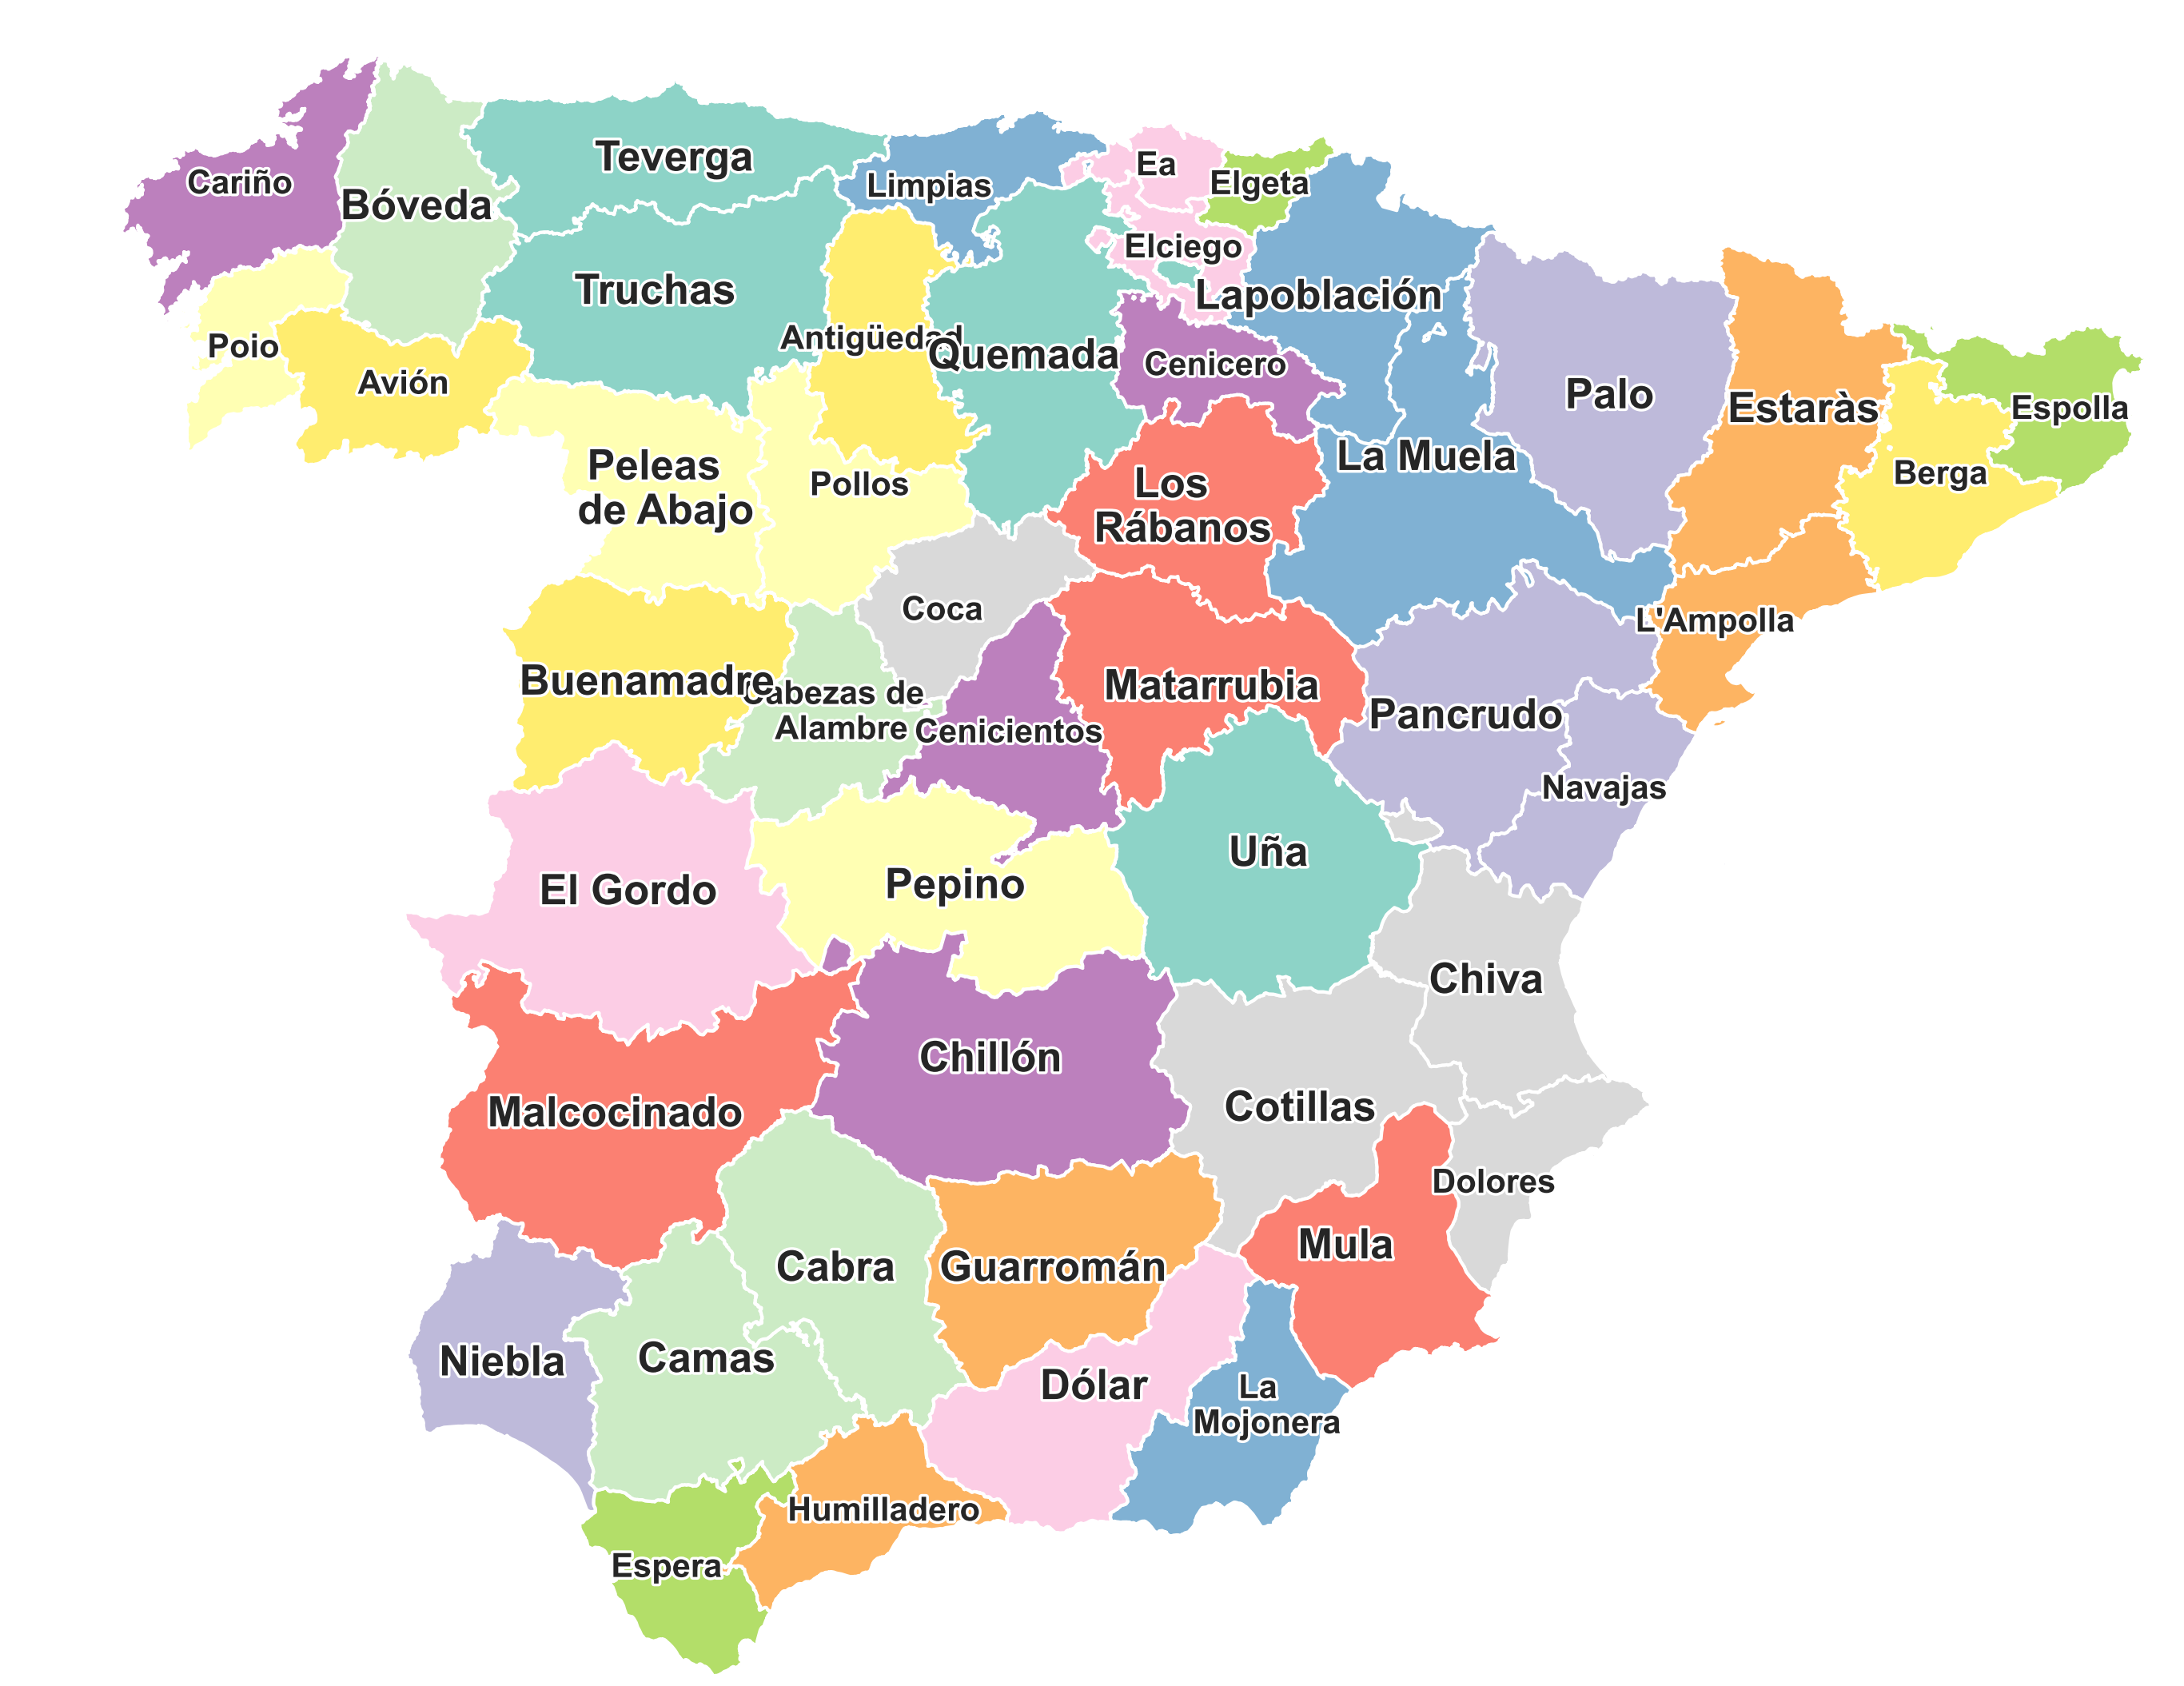

In [17]:
### MAPA NORMAL ###


# Importar Seaborn y establecer el estilo de gráficos
import seaborn as sns
sns.set_style("dark")

# Definir la figura y los ejes
fig, ax = plt.subplots(figsize=(35,35))
ax.set_axis_off()

# Eliminar las islas Baleares del DataFrame comunidades
provincias = provincias[provincias["ccaa"] != "Illes Balears"]
provincias = provincias[provincias["ccaa"] != "Canarias"]


# Definir la paleta de colores
cmap = 'Set3_r'  ## AQUÍ DEBO CAMBIAR EL CÓDIGO DE COLORES ##
bounds = np.arange(0, 20)



# Graficar los datos en el mapa con la nueva paleta de colores
merged.plot(column="dato", cmap=cmap, ax=ax, edgecolor="white", linewidth=3, legend=False)



# Ajustar la visualización del mapa
ax.set_xlim(-10, 3.5)
ax.set_ylim(36, 44)
ax.set_aspect(aspect=1.3) # Ajustar manualmente la proporción de los ejes

# Agrega el texto a cada región
for idx, row in merged.iterrows():
    region_size = row["geometry"].area
    if region_size < 0.90:   # El umbral según el tamaño de la CCAA para el texto
        fontsize = 30
    else:
        fontsize = 38
    
    plt.annotate(text=row["dato"], xy=row["coords"], ha="center", va="center", fontsize=fontsize, fontweight='bold', path_effects=[path_effects.withStroke(linewidth=5, foreground="white")])

# Ajustar el tamaño de fuente y la anchura de línea de los bordes
for spine in ax.spines.values():
    spine.set_linewidth(0.6)
    spine.set_edgecolor("black")
    
plt.draw()

import time
time.sleep(1)  # espera 1 segundo para asegurarse de que el dibujo esté completo

if fig.canvas.get_renderer() is not None:
    plt.savefig('C:/Users/Santiago/Downloads/mapa2.png', bbox_inches='tight', transparent=True,dpi=300)
else:
    print('La figura no se ha generado correctamente')

plt.show()


# Mostrar la figura
plt.show()


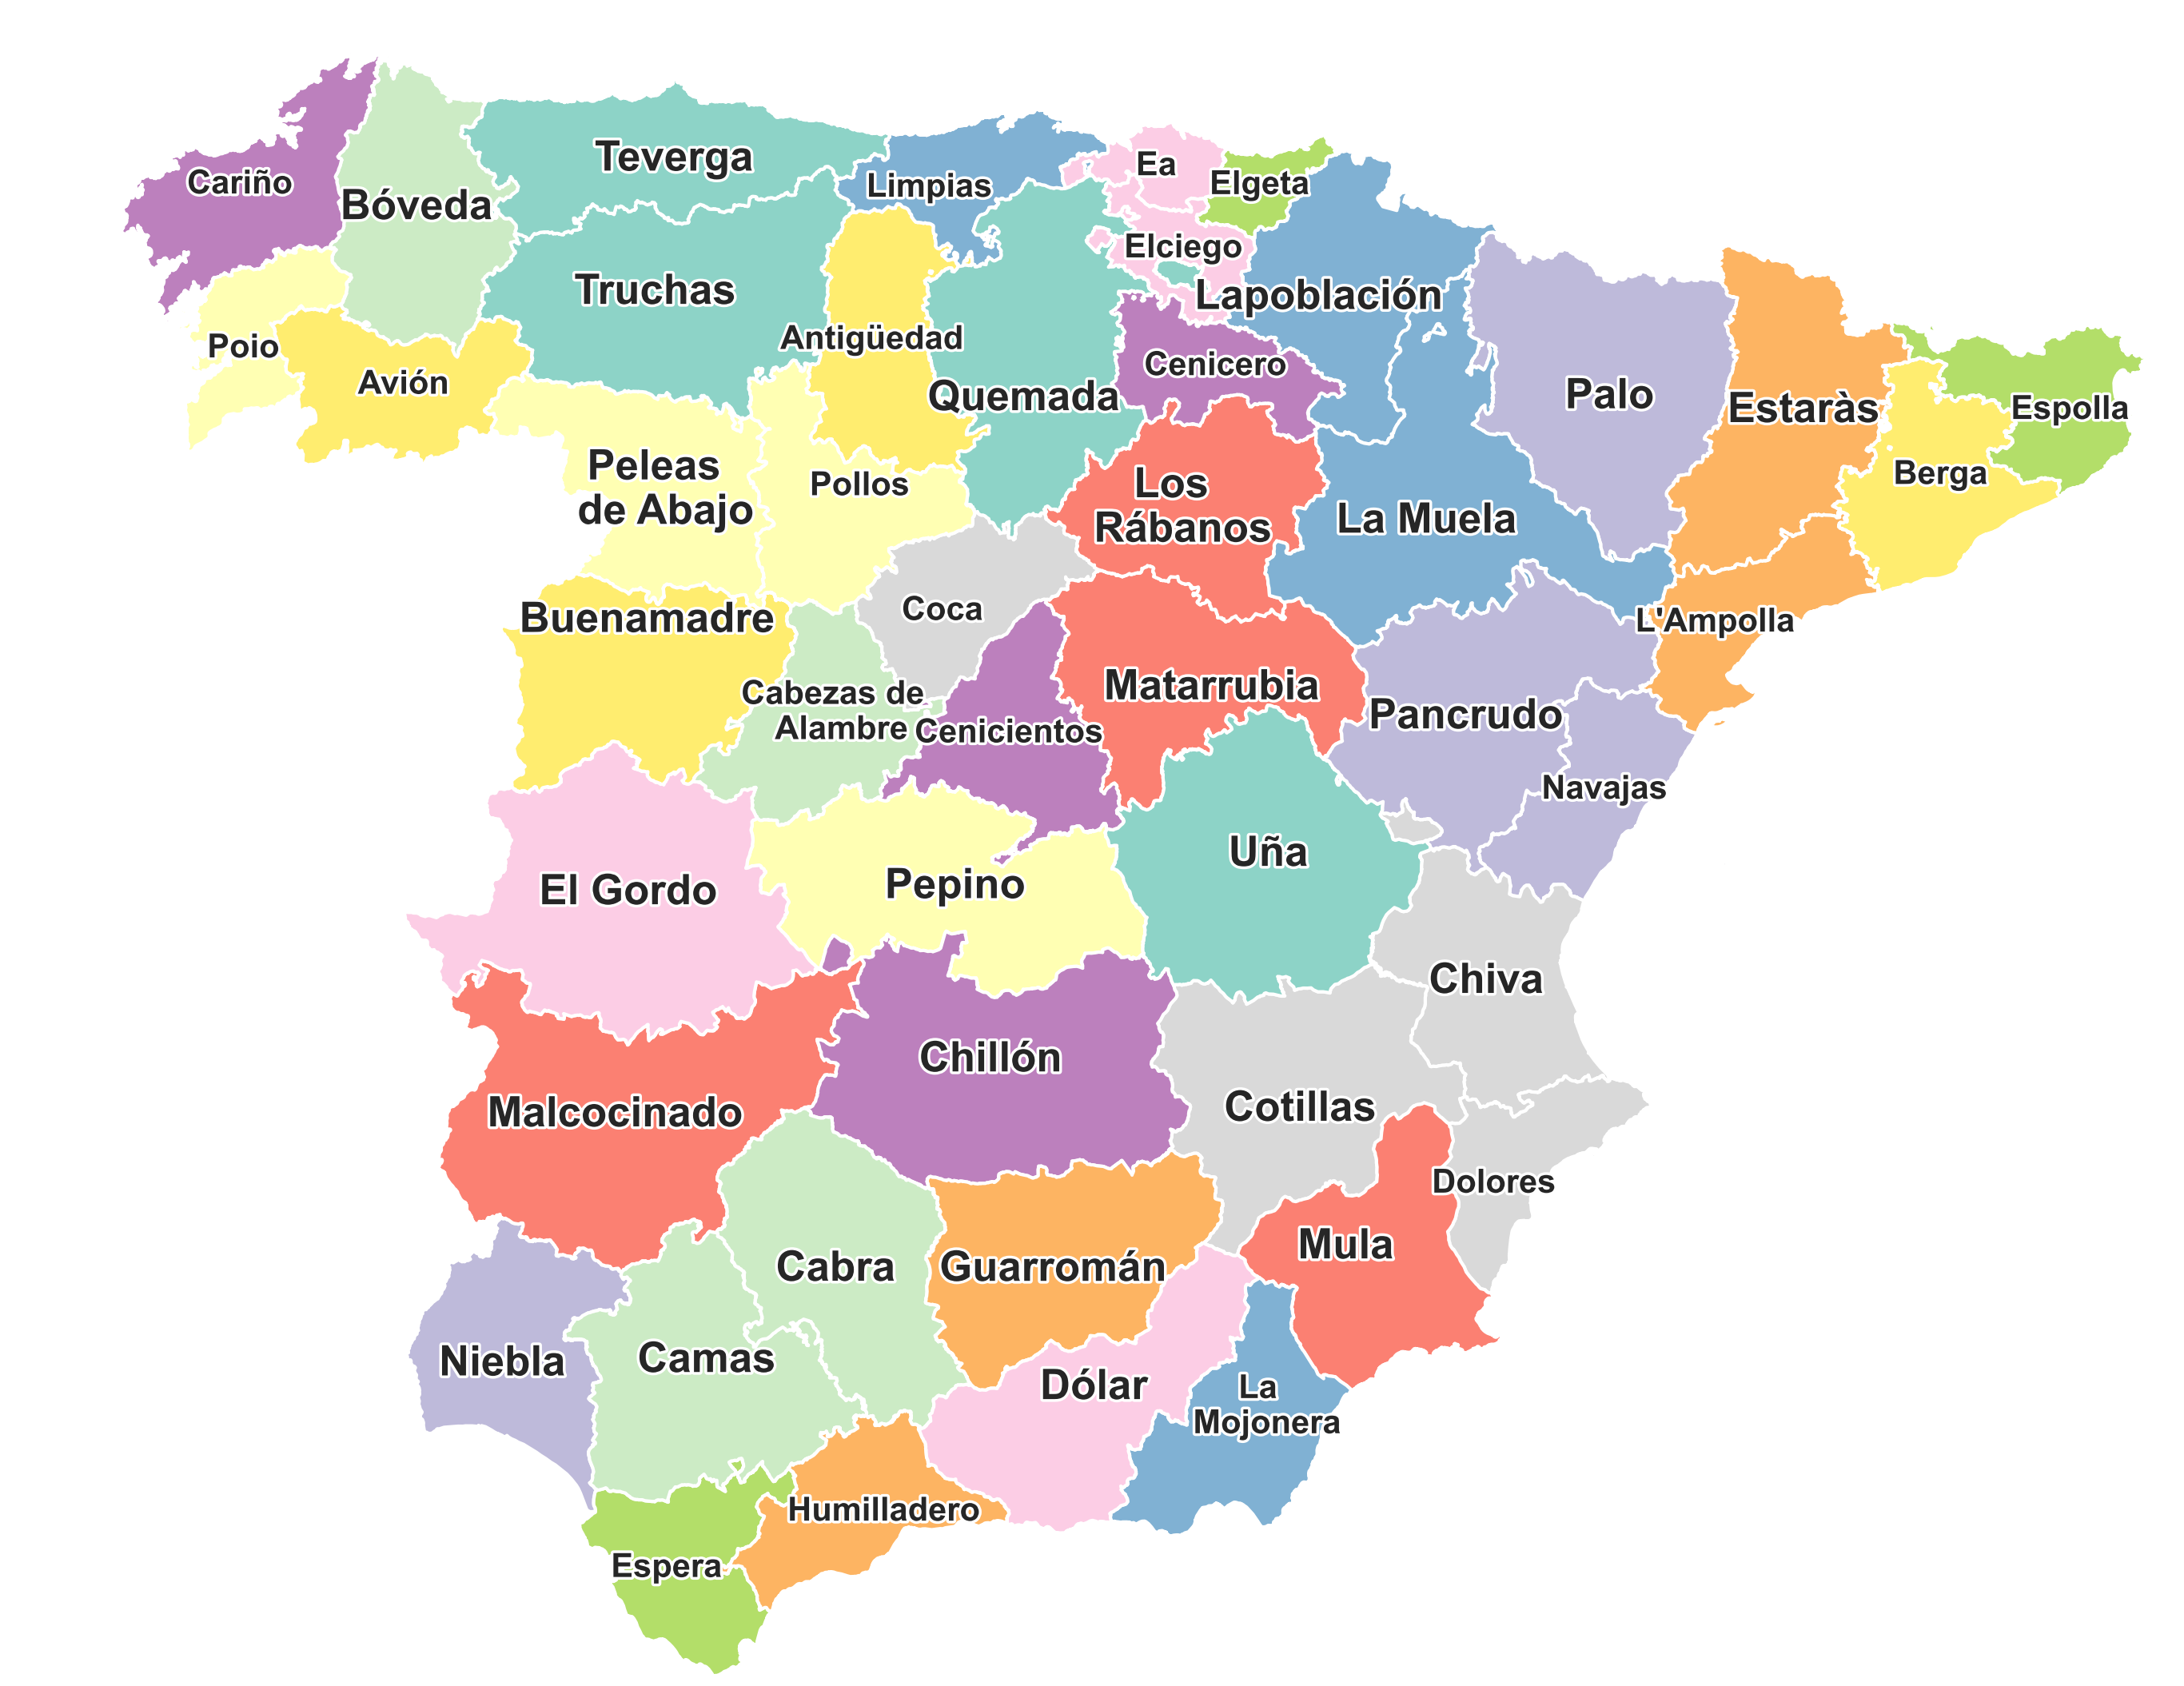

In [18]:
#### MAPA MODIFICANDO LA POSICIÓN DE LAS ETIQUETAS QUE SE SOBREPONEN ####


# Importar Seaborn y establecer el estilo de gráficos
import seaborn as sns
sns.set_style("dark")

# Definir la figura y los ejes
fig, ax = plt.subplots(figsize=(35,35))
ax.set_axis_off()

# Eliminar las islas Baleares del DataFrame comunidades
provincias = provincias[provincias["ccaa"] != "Illes Balears"]
provincias = provincias[provincias["ccaa"] != "Canarias"]

# Definir la paleta de colores
cmap = 'Set3_r'  ## AQUÍ DEBO CAMBIAR EL CÓDIGO DE COLORES ##
bounds = np.arange(0, 20)

# Graficar los datos en el mapa con la nueva paleta de colores
merged.plot(column="dato", cmap=cmap, ax=ax, edgecolor="white", linewidth=3, legend=False)

# Ajustar la visualización del mapa
ax.set_xlim(-10, 3.5)
ax.set_ylim(36, 44)
ax.set_aspect(aspect=1.3) # Ajustar manualmente la proporción de los ejes

# Agrega el texto a cada región
for idx, row in merged.iterrows():
    region_size = row["geometry"].area
    if region_size < 0.90:   # El umbral según el tamaño de la CCAA
        fontsize = 30
    else:
        fontsize = 38
    
    # Modificar la posición vertical de las etiquetas para Burgos, Salamanca y Zaragoza
    if row["provincia"] == "Burgos":
        xy = (row["coords"][0], row["coords"][1] - 0.2)  # Reducir la coordenada Y
    elif row["provincia"] == "Salamanca":
        xy = (row["coords"][0], row["coords"][1] + 0.3)  # Aumentar la coordenada Y
    elif row["provincia"] == "Zaragoza":
        xy = (row["coords"][0], row["coords"][1] - 0.3)  # Aumentar la coordenada Y
    else:
        xy = row["coords"]
    
    plt.annotate(text=row["dato"], xy=xy, ha="center", va="center", fontsize=fontsize, fontweight='bold', path_effects=[path_effects.withStroke(linewidth=5, foreground="white")])

# Ajustar el tamaño de fuente y la anchura de línea de los bordes
for spine in ax.spines.values():
    spine.set_linewidth(0.6)
    spine.set_edgecolor("black")
    
plt.draw()

import time
time.sleep(1)  # espera 1 segundo para asegurarse de que el dibujo esté completo

if fig.canvas.get_renderer() is not None:
    plt.savefig('C:/Users/Santiago/Downloads/mapa2.png', bbox_inches='tight', transparent=True,dpi=300)
else:
    print('La figura no se ha generado correctamente')

plt.show()